In [1]:
%matplotlib inline

import intake
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats
import warnings

from regress_utils import scatter_tas_SIE_linreg

#### Load dataset

In [2]:
# Load dataset
collection_fname = 'dset_dict_historical.npy'
#collection_fname = 'dset_dict_piControl.npy'

dset_dict = np.load(collection_fname, allow_pickle='TRUE').item()
first_dset = list(dset_dict.keys())[0]
models_intersect = dset_dict[first_dset].keys()

#### Regression of sea ice extent on arctic temperature for each model for multiple ensemble members

In [3]:
# Set maximum number of ensemble members to look at for each model
#N.B. doing this for anomalies give you the same answer as not anomalies. Which makes sense when you think about it.
max_ems = 5

warnings.filterwarnings('ignore')

slopes_all, r_all = {}, {}
for m in models_intersect:
    # get ensemble members
    ems = dset_dict['siconc'][m]['member_id'].values
    if len(ems)>max_ems:
        ems = ems[0:max_ems]
    print(m, len(ems))
    
    # Perform regression
    slopes_all[m], r_all[m] = {}, {}
    for i, em in enumerate(ems):
        print(em)
        slopes_all[m][i], r_all[m][i] = scatter_tas_SIE_linreg(
                                                        dset_dict['tas'][m]['tas_arc_mean'].sel(member_id=em),
                                                        dset_dict['siconc'][m]['sie_tot_arc'].sel(member_id=em),
                                                        [2,8], False, m)

warnings.filterwarnings('default')

CanESM5 5
r4i1p2f1
r23i1p1f1
r7i1p1f1
r14i1p2f1
r9i1p1f1
CESM2 5
r10i1p1f1
r7i1p1f1
r9i1p1f1
r4i1p1f1
r1i1p1f1
MIROC6 5
r10i1p1f1
r7i1p1f1
r9i1p1f1
r4i1p1f1
r1i1p1f1
MIROC-ES2L 3
r1i1p1f2
r2i1p1f2
r3i1p1f2
SAM0-UNICON 1
r1i1p1f1
NorCPM1 1
r26i1p1f1


In [4]:
# Calculate ensemble mean and r values for each model
slopes_mean, r_mean = {}, {}

print('Model, slopes (mar, sept), r (mar, sept)')
print()
for m in models_intersect:
    slopes_mean_temp, r_mean_temp = [], []
    for em in slopes_all[m].keys():
        slopes_mean_temp.append(slopes_all[m][em])
        r_mean_temp.append(r_all[m][em])        
        
    slopes_mean[m] = np.mean(slopes_mean_temp,0)
    r_mean[m] = np.mean(r_mean_temp,0)
    
    print(m, slopes_mean[m], r_mean[m])

Model, slopes (mar, sept), r (mar, sept)

CanESM5 [-0.1732774  -0.46053736] [-0.48773825 -0.74460261]
CESM2 [-0.09336018 -1.21392784] [-0.56351712 -0.83998228]
MIROC6 [-0.08038408 -0.62241664] [-0.40935027 -0.82928912]
MIROC-ES2L [-0.09192133 -0.65859899] [-0.36098676 -0.82239082]
SAM0-UNICON [-0.09876842 -0.39225192] [-0.32149741 -0.73354963]
NorCPM1 [-0.08358198 -0.227611  ] [-0.34998617 -0.67983657]


#### Save

In [5]:
# Save dictionaries for future use
results_fname = 'results_' + collection_fname[10:]
save_flag = True
if save_flag:
    if dset_dict:
        np.save(results_fname, slopes_mean, r_mean)

#### Plots

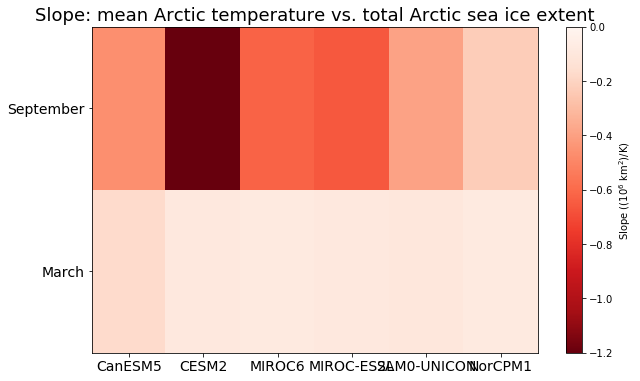

In [6]:
# Plot slopes for all models
slopes_plot = np.zeros((2,len(slopes_mean.keys())))

for im, m in enumerate(slopes_mean.keys()):
    slopes_plot[0,im] = slopes_mean[m][0]
    slopes_plot[1,im] = slopes_mean[m][1]
    
fig = plt.figure(figsize=(10,6))
plt.pcolormesh(slopes_plot, cmap='Reds_r')
plt.clim(0, -1.2)
plt.xticks(np.arange(0, len(models_intersect), 1) + 0.5,list(slopes_all.keys()),fontsize=14)
plt.yticks([0.5,1.5],['March','September'],fontsize=14)
plt.title('Slope: mean Arctic temperature vs. total Arctic sea ice extent', fontsize=18)
plt.colorbar(label='Slope ((10$^{6}$ km$^{2}$)/K)')

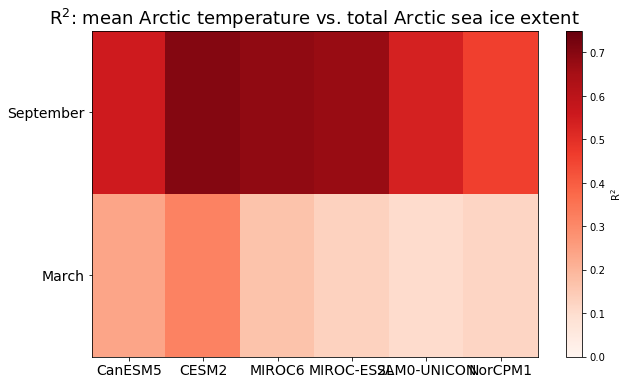

In [7]:
# Plot R squared for all models
r_plot = np.zeros((2,len(r_mean.keys())))

for im, m in enumerate(r_mean.keys()):
    r_plot[0,im] = r_mean[m][0]*r_mean[m][0]
    r_plot[1,im] = r_mean[m][1]*r_mean[m][1]
    
fig = plt.figure(figsize=(10,6))
plt.pcolormesh(r_plot, cmap='Reds')
plt.clim(0, 0.75)
plt.xticks(np.arange(0, len(models_intersect), 1) + 0.5,list(slopes_all.keys()),fontsize=14)
plt.yticks([0.5,1.5],['March','September'],fontsize=14)
plt.title('R$^{2}$: mean Arctic temperature vs. total Arctic sea ice extent', fontsize=18)
plt.colorbar(label='R$^{2}$')